# Libraries

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warning
import warnings
warnings.filterwarnings('ignore')

# Read and Explore the Data

In [2]:
#import train and test CSV files
train = pd.read_csv("E:/Kaggle.Challenges/Machine.Learning.Titanic/Dataset/train.csv")
test = pd.read_csv("E:/Kaggle.Challenges/Machine.Learning.Titanic/Dataset/test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Devaney, Miss. Margaret Delia",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
#save PassengerID for a future output
ids = test['PassengerId']

In [4]:
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S


In [6]:
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Devaney, Miss. Margaret Delia",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Some Observations:
*There are a total of 891 passengers in our training set

*The Age feature is missing approxiamtely 19.8% of its values. 
I'm guesssing that the Age feature is pretty important to 
survival, 
so, we shoul probably attempt to fill these gaps.

*The Cabin feature is missing approximately 77.1% of its values.
Since so much of the feature is missing, it would be hard to fill in the missing values.
We will probably drop these values from our dataset.

*The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [7]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Some predictions:
*Sex: Females are more likely to survive

*SibSp/Parch: People traveling alone are more likely to survive.

*Age: Young children are more likely to survive.

*Pclass: People of higer socioeconomic class are more likely to survive.

# Data analysis and visualization

Survival Correlation by:  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
__________ 

Survival Correlation by:  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
__________ 

Survival Correlation by:  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
__________ 

Survival Correlation by:  Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
__________ 

Survival Correlation by:  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
__________ 



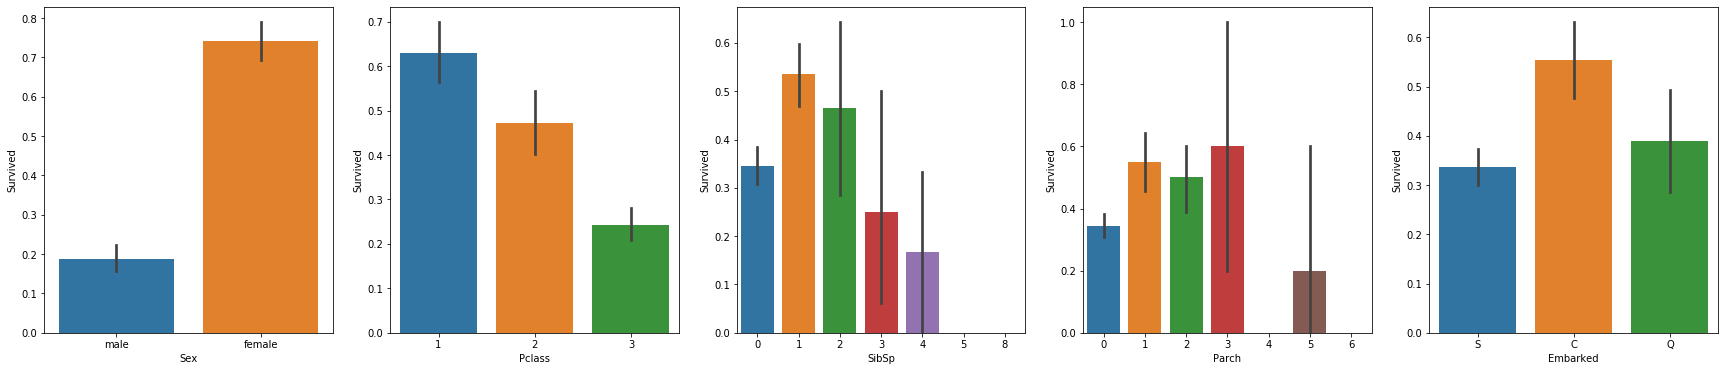

In [8]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
fig, saxis = plt.subplots(1, len(features), figsize=(len(features) * 6, 6))
for ind, x in enumerate(features):
    print('Survival Correlation by: ', x)
    print(train[[x, 'Survived']].groupby(x, as_index=False).mean())
    print('_'*10, '\n')
    #draw a bar plot of survival by sex
    sns.barplot(x, y='Survived', data=train, ax=saxis[ind])


# As predicted,

*Females have a much higher chance of survival than males.
The Sex feature is essential in our predictions.

*People with higher sociioeconomic class had a higher rate of survival.
(62.9% vs. 47.3% vs. 24.2%)

# Age Feature

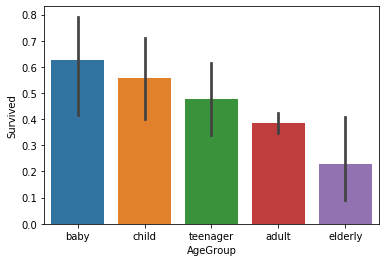

In [9]:
#sort the ages into logical catgeories
bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train.Age, bins, labels = labels)
train['AgeGroup'] = age_groups

#draw a bar plot of Age vs. survival
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show()

# Cabin Feature

Survival Correlation by: Cabin
   CabinBool  Survived
0          0  0.299854
1          1  0.666667


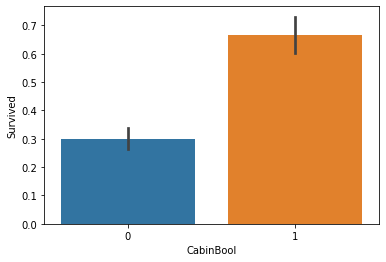

In [10]:
# The idea here is that people with recorded cabin numbers are of higher
# socioeconomic class, and thus more likely to survive.

train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

#calculate precentages of CabinBool vs. Survived

print('Survival Correlation by: Cabin')
print(train[['CabinBool', 'Survived']].groupby('CabinBool', as_index=False).mean())

#draw a bar plot of CabinBool vs. Survival
sns.barplot(x='CabinBool', y='Survived', data=train)
plt.show()

# Cleaning and Transforming the Data

Time to clean our ddata to account for missing values 
and unnecessary information!

# Looking at the test data

let's see how our test data looks!

In [11]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN
top,NaN,NaN,"Ashby, Mr. John",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,0.000000


We have a total of 418 passengers.
One value from the Fare feature is missing.
Around 20.5% of the Age feature is missing, we will need to fill that in.

# Combining training and test data for cleaning and transforming

In [12]:
all_data = pd.concat([train, test], ignore_index=True)
print(all_data.shape)

(1309, 14)


# Filling simple missing features

In [13]:
#complete embarked with mode
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

#complete missing fare with median
all_data['Fare'].fillna(all_data['Fare'].median(), inplace=True)

# Filling missing features using other features

Age Feature

Next we will fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be irrational to fill all of them with the same value(as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

In [14]:
#Extract the title for each Name

all_data['Title'] = all_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

all_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Capt          1
Don           1
Dona          1
Lady          1
Jonkheer      1
Mme           1
Countess      1
Sir           1
Name: Title, dtype: int64

In [15]:
frequent_titles = all_data['Title'].value_counts()[:5].index.tolist()
frequent_titles

['Mr', 'Miss', 'Mrs', 'Master', 'Dr']

In [16]:
#keep only the most frequent titles
all_data['Title'] = all_data['Title'].apply(lambda x:x if x in frequent_titles else 'Other')
# all_data.head()

In [17]:
# fill missing age with median age group for each title
median_ages = {}
# calculate median age for different titles
for title in frequent_titles:
    median_ages[title] = all_data.loc[all_data['Title'] == title]['Age'].median()
median_ages['Other'] = all_data['Age'].median()
all_data.loc[all_data['Age'].isnull(), 'Age'] = all_data[all_data['Age'].isnull()]['Title'].map(median_ages)


In [18]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,0,Mr


# Encoding categorical features with non-numerical values

Use LabelEncoder for categorical features

In [19]:
from sklearn.preprocessing import LabelEncoder

Cat_Features = ['Sex', 'Embarked', 'Title']
for feature in Cat_Features:
    label = LabelEncoder()
    all_data[feature] = label.fit_transform(all_data[feature])
    


# Creating frequency bins for continuous variables and encoding

Use qcut and LabelEncoder for continuous variable bins

In [20]:
Cont_Features = ['Age', 'Fare']
num_bins = 5
for feature in Cont_Features:
    bin_feature = feature + 'Bin'
    all_data[bin_feature] = pd.qcut(all_data[feature], num_bins)
    label = LabelEncoder()
    all_data[bin_feature] = label.fit_transform(all_data[bin_feature])
    
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title,AgeBin,FareBin
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,adult,0,3,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,adult,1,4,3,4
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,adult,0,2,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,adult,1,4,3,4
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,adult,0,3,3,1


# Feature Creation

We are going to create one additional feature, which can improve the model. As it was observed in many other notebooks the members of the families with children have higher probability to survive.

First, we are going to identify families.
It appears that passengers with same surnames have the same Ticket names. Let's extract the surnames and tickets name and find out duplicate ones. There may be passengers from the same families.

In [21]:
all_data['Surname'] = all_data.Name.str.extract(r'([A-Za-z]+),', expand=False)
all_data['TicketPrefix'] = all_data.Ticket.str.extract(r'(.*\d)', expand=False)
all_data['Surname_Ticket'] = all_data['Surname'] + all_data['TicketPrefix']
all_data['IsFamily'] = all_data.Surname_Ticket.duplicated(keep=False).astype(int)

Next, we find the families with children.

In [22]:
all_data['Child'] = all_data.Age.map(lambda x: 1 if x <=16 else 0)
FamilyWithChild = all_data[(all_data.IsFamily==1)&(all_data.Child==1)]['Surname_Ticket'].unique()
len(FamilyWithChild)

66

These are 66 families which have 1 or more children.
Encode each family with children and assign 0 for others.

In [23]:
all_data['FamilyId'] = 0
for ind, identifier in enumerate(FamilyWithChild):
    all_data.loc[all_data.Surname_Ticket==identifier, ['FamilyId']] = ind + 1
    

For each family of above, if there is at least one survived, we assume the others can survive too.

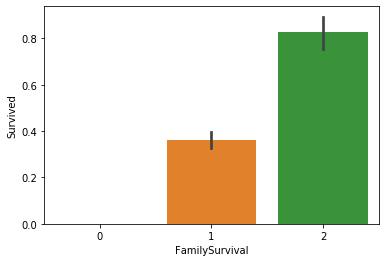

In [24]:
all_data['FamilySurvival'] = 1
Survived_by_FamilyId = all_data.groupby('FamilyId').Survived.sum()
for i in range(1, len(FamilyWithChild)+1):
    if Survived_by_FamilyId[i] >= 1:
        all_data.loc[all_data.FamilyId==i, ['FamilySurvival']] = 2
    elif Survived_by_FamilyId[i] == 0:
        all_data.loc[all_data.FamilyId==i, ['FamilySurvival']] = 0
sns.barplot(x='FamilySurvival', y='Survived', data=all_data)
plt.show()

# Splitting back train and test data

In [25]:
train = all_data[: len(train)]
test = all_data[len(train):]
train.shape

(891, 24)

# Features to keep in train data

We can drop now some original features that we don't need or that we have used already to create new features.

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'CabinBool',
       'Title', 'AgeBin', 'FareBin', 'Surname', 'TicketPrefix',
       'Surname_Ticket', 'IsFamily', 'Child', 'FamilyId', 'FamilySurvival'],
      dtype='object')

In [27]:
# keep only some columns
X_train = train[['Pclass', 'Sex', 'Parch', 'Embarked', 'CabinBool', 'Title', 'AgeBin', 'FareBin', 'FamilySurvival']]
y_train = train['Survived']

# Model and Feature Selection

In [28]:
# we start with this very powerful classifier
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=False)


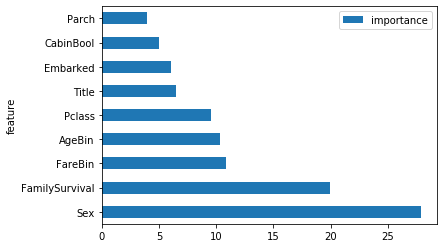

In [29]:
model.fit(X_train, y_train)
importance = pd.DataFrame({'feature' :X_train.columns, 'importance': model.feature_importances_})
importance.sort_values('importance', ascending=False).set_index('feature').plot(kind='barh')
plt.show()

In [30]:
X_train.columns

Index(['Pclass', 'Sex', 'Parch', 'Embarked', 'CabinBool', 'Title', 'AgeBin',
       'FareBin', 'FamilySurvival'],
      dtype='object')

In [31]:
main_features = ['Sex', 'FamilySurvival', 'FareBin', 'Pclass', 'Title']

X_test = test[main_features]
X_train = train[main_features]

In [32]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=model, X=X_train, y=y_train, cv=5).mean()

0.8473353838428223

# Voting Classifier

Create an ensemble of models showing the best performance in the previous notebook.

In [33]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm, neighbors
from xgboost import XGBClassifier

ensemble = [CatBoostClassifier(verbose=False), RandomForestClassifier(), svm.NuSVC(probability=True), neighbors.KNeighborsClassifier()]
classifiers_with_names = []
_ = [classifiers_with_names.append((clf.__class__.__name__, clf)) for clf in ensemble]
voting = VotingClassifier(classifiers_with_names, voting='hard')
cv_results = cross_validate(voting, X_train, y_train, cv=5)
print(cv_results['test_score'].mean())

voting.fit(X_train, y_train)
predictions  = voting.predict(X_test)

0.8462117883372041
